In questa parte ci occupiamo della parte 'demografica' della Serie A. Andremo ad analizzare come son distribuite le età, le nazionalità ed i minuti giocati, per gli attaccanti. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats
import tensorflow as tf
from scipy.interpolate import make_interp_spline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

# Elenco dei file da leggere
files = ['attaccanti_23.xlsx', 'attaccanti_22.xlsx', 'attaccanti_21.xlsx', 'attaccanti_20.xlsx', 'attaccanti_19.xlsx']

# Faccio un dizionario per mappare i file agli anni
year_mapping= {'attaccanti_23.xlsx': 2023,'attaccanti_22.xlsx': 2022,'attaccanti_21.xlsx': 2021,'attaccanti_20.xlsx': 2020,
                'attaccanti_19.xlsx': 2019}

Dopo aver importato i file necessari andiamo ad analizzare come sono variate le età nei 5 anni analizzati, visualizziamo il tutto con un diagramma a torta.

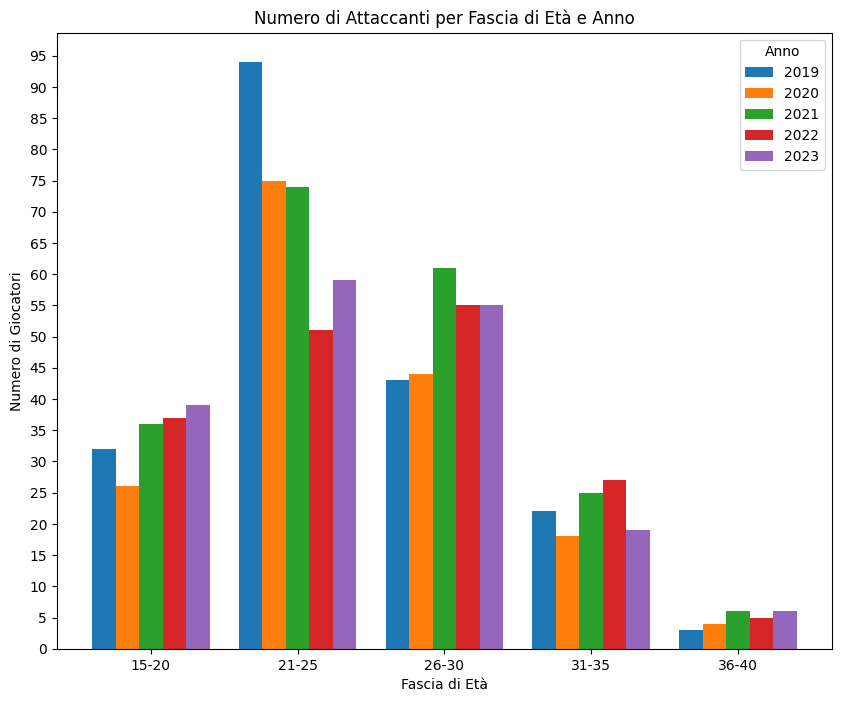

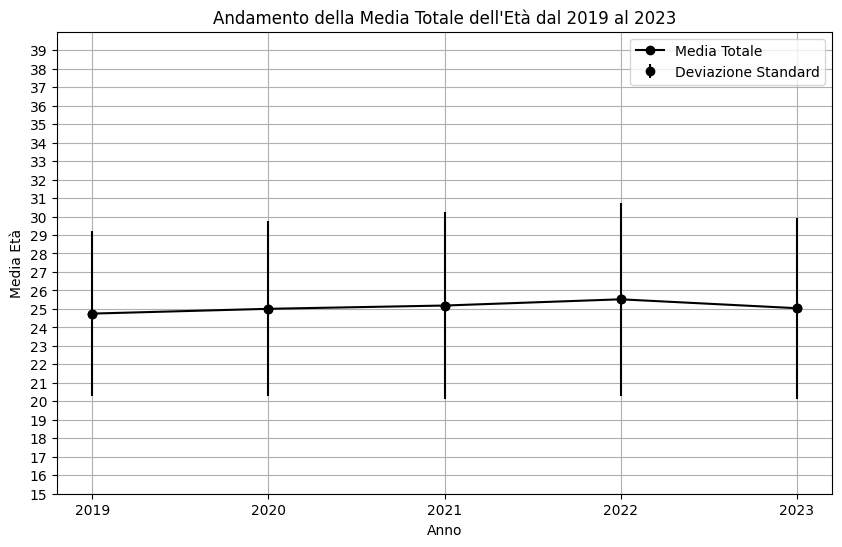

In [9]:
# Definisci le fasce di età e le etichette
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Dizionario per conservare i conteggi annuali per ciascuna fascia d'età
fasce_eta_conti = {label: [] for label in labels}
medie_totali_annuali = []
deviazioni_annuali = []  # Nuova lista per memorizzare le deviazioni standard

# Ciclo sui file per calcolare la numerosità per ciascuna fascia, la media totale e la deviazione standard
for file in files:
    # Leggi i dati da ogni file (si presuppone che ci sia una colonna 'Age')
    data = pd.read_excel(file)
    eta = data['Age']
    
    # Categorizza le età nelle fasce specificate
    eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)
    
    # Conta il numero di giocatori per ciascuna fascia di età e salva nel dizionario
    for label in labels:
        conteggio_eta_fascia = (eta_bins == label).sum()
        fasce_eta_conti[label].append(conteggio_eta_fascia)
    
    # Calcola la media e la deviazione standard dell'età per l'anno
    media_eta_totale = eta.mean()
    deviazione_eta_totale = eta.std(ddof=1)  # ddof=1 per deviazione standard campionaria
    
    # Aggiungi i valori alla lista
    medie_totali_annuali.append(media_eta_totale)
    deviazioni_annuali.append(deviazione_eta_totale)

# Numero di anni considerati
anni = ['2019', '2020', '2021', '2022', '2023']

# Creazione del grafico a barre (numerosità per fascia di età e anno)
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.8
mini_bar_width = bar_width / len(anni)
x_pos = np.arange(len(labels))

for i, anno in enumerate(anni):
    conti_annuali = [fasce_eta_conti[label][i] for label in labels]
    offset = (i - (len(anni) - 1) / 2) * mini_bar_width
    ax.bar(x_pos + offset, conti_annuali, mini_bar_width, label=anno)

# Configurazione degli assi e delle etichette
ax.set_xlabel('Fascia di Età')
ax.set_ylabel('Numero di Giocatori')
ax.set_title('Numero di Attaccanti per Fascia di Età e Anno')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.legend(title='Anno')

# Imposta il range dell'asse y con incrementi di 5
max_y = max(max(conti_annuali) for conti_annuali in fasce_eta_conti.values())
ax.set_yticks(np.arange(0, max_y + 5, 5))

# Mostra il grafico a barre
plt.show()

# Creazione del grafico a linee per la media totale anno per anno
fig, ax = plt.subplots(figsize=(10, 6))

# Traccia l'andamento delle medie totali annuali
ax.plot(anni, medie_totali_annuali, marker='o', color='k', label='Media Totale')

# Aggiungi le deviazioni standard come barre di errore
ax.errorbar(anni, medie_totali_annuali, yerr=deviazioni_annuali, fmt='o', color='k', label='Deviazione Standard')

ax.set_xlabel('Anno')
ax.set_ylabel('Media Età')
ax.set_title("Andamento della Media Totale dell'Età dal 2019 al 2023")

ax.set_ylim(15,40)
ax.set_yticks(np.arange(15,40,1))

ax.grid(True)
ax.legend()

# Mostra il grafico a linee con barre di errore
plt.show()

Passiamo ora all'analisi delle nazionalità. Vediamo quali sono le nazionalità più presenti in Serie A.

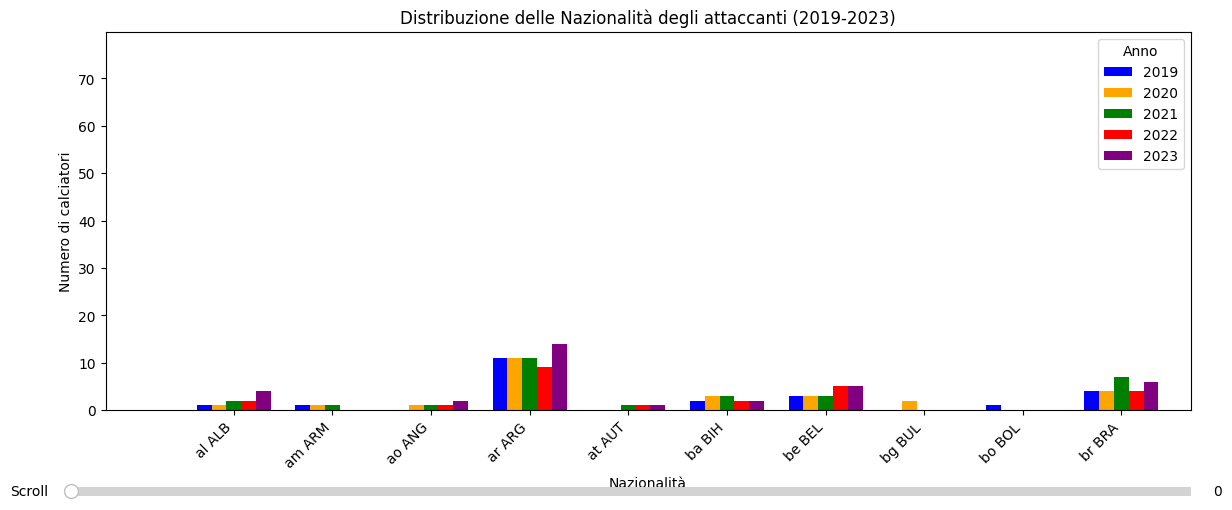

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Elenco dei file da leggere e mappatura degli anni
files = ['attaccanti_23.xlsx', 'attaccanti_22.xlsx', 'attaccanti_21.xlsx', 'attaccanti_20.xlsx', 'attaccanti_19.xlsx']
year_mapping = {
    'attaccanti_23.xlsx': 2023,
    'attaccanti_22.xlsx': 2022,
    'attaccanti_21.xlsx': 2021,
    'attaccanti_20.xlsx': 2020,
    'attaccanti_19.xlsx': 2019
}

# Dati per tutte le nazionalità
all_nations_counts = {}

# Ciclo sui file per raccogliere i dati di tutte le nazionalità per ogni anno
for file in files:
    data = pd.read_excel(file)
    year = year_mapping[file]
    
    # Conta i calciatori per ciascuna nazionalità
    nazionalita_counts = data['Nation'].value_counts()
    
    # Aggiungi i conteggi al dizionario per l'anno corrispondente
    for nation, count in nazionalita_counts.items():
        if nation not in all_nations_counts:
            all_nations_counts[nation] = {}
        all_nations_counts[nation][year] = count

# Lista ordinata delle nazionalità
nations = sorted(all_nations_counts.keys())
years = [2019, 2020, 2021, 2022, 2023]
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Preparazione del grafico
fig, ax = plt.subplots(figsize=(14, 6))

# Aggiunta delle barre per ogni anno e per ogni nazionalità
for idx, year in enumerate(years):
    nation_counts_per_year = [
        all_nations_counts[nation].get(year, 0) for nation in nations
    ]
    
    # Creazione delle barre per ogni anno con un leggero offset per separarle
    ax.bar(
        [x + idx * 0.15 for x in range(len(nations))], 
        nation_counts_per_year, 
        width=0.15, 
        color=colors[idx], 
        label=str(year)
    )

# Aggiunta dei titoli e delle etichette
ax.set_title('Distribuzione delle Nazionalità degli attaccanti (2019-2023)')
ax.set_xlabel('Nazionalità')
ax.set_ylabel('Numero di calciatori')

# Imposta le etichette dell'asse x con le nazionalità ordinate
ax.set_xticks([i + 0.3 for i in range(len(nations))])
ax.set_xticklabels(nations, rotation=45, ha='right')

# Aggiungi la legenda
ax.legend(title='Anno')

# Limita la vista iniziale e aggiungi la barra di scorrimento
plt.xlim(-1, 10)  # Mostra solo le prime 10 nazionalità; si scorre per vedere le restanti

# Aggiungi una barra di scorrimento orizzontale
fig.subplots_adjust(bottom=0.25)  # Spazio per la barra di scorrimento
ax_scroll = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor="lightgrey")
scroll = Slider(ax_scroll, 'Scroll', 0, len(nations) - 10, valinit=0)

# Funzione per aggiornare la visualizzazione
def update(val):
    pos = scroll.val
    ax.set_xlim(pos, pos + 10)  # Aggiorna la vista per mostrare solo 10 nazionalità alla volta
    fig.canvas.draw_idle()

scroll.on_changed(update)

# Mostra il grafico
plt.show()



In [23]:
!pip install notebook
!pip install ipykernel

"pip" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
"pip" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [ ]:
for file in files:
 data = pd.read_excel(file)

 # Estrai i dati rilevanti (calciatori e valori nella settima colonna)
 calciatori = data['Player']  # Assume che i nomi dei calciatori siano nella prima colonna
 valori = data['MP']      # Settima colonna partendo da sinistra

 filtrato = valori > 20
 calciatori_filtrati = calciatori[filtrato]
 valori_filtrati = valori[filtrato]

 # Crea un istogramma
 plt.figure(figsize=(12, 8))
 plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

 # Ottimizza il layout
 plt.xlabel('Calciatori', fontsize=14)
 plt.ylabel('Valori', fontsize=14)
 plt.title(f"Minuti giocati dai Calciatori divisi per 90' Anno: {year_mapping[file]}")
 plt.xticks(rotation=45, ha='right', fontsize=10)
 plt.yticks(fontsize=12)

 # Aggiungi una curva di fit
 x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
 spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
 x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
 y_smooth = spl(x_smooth)

 plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

 plt.tight_layout()
 plt.legend()
 plt.show()

 media_valori_filtrati = valori_filtrati.mean()

 # Mostra il risultato
 print(f"La media per l'Anno {year_mapping[file]} è:{media_valori_filtrati}")

In questi grafici vediamo la distribuzione dei minuti giocati diviso 90 dagli attaccanti. In altre parole calcoliamo quante partite complete vengono giocate dagli attaccanti. Abbiamo messo un bound inferiore di 20 minuti giocati per evitare che i dati vengano sfalsati da giocatori con pochi minuti giocati. Vediamo che la distribuzione e la media rimane più o meno la stessa nel corso degli anni. La media addirittura oscilla fra 29.42 e 29.98.

In [ ]:
# Aggiungiamo una cella di codice che stampa gli istogrammi di tutte le statistiche di tutti 5 gli anni. In modo da poterli 
# analizzare singolarmente in seguito, senza appesantire il codice con tutti i grafici.

In [ ]:
for file in files:
 data = pd.read_excel(file)

# Selezionare solo le colonne numeriche
numeric_data = data.select_dtypes(include=[np.number])

# Funzione per calcolare il numero di bin con la regola di Freedman-Diaconis
def freedman_diaconis_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    if iqr == 0:  # Evitare divisioni per zero
        return 20  # Numero di bin di default in caso di IQR nullo
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    if bin_width == 0:
        return 5  # Numero di bin di default in caso di width troppo piccolo
    return int(np.ceil((data.max() - data.min()) / bin_width))

# Creare istogrammi per ogni colonna numerica con controllo su variazioni minime
for column in numeric_data.columns:
    col_data = numeric_data[column].dropna()  # Rimuovi eventuali valori NaN
    if col_data.empty or col_data.max() == col_data.min():
        continue
    
    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    bins = freedman_diaconis_bins(col_data)
    
    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor = 'r', label='Dati')

    # Titolo e etichette
    plt.title(f'Istogramma della colonna: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Numero di giocatori')

    # Printa tutti gli istogrammi, commentare le righe sotto per evitare
    plt.show()
    media = col_data.mean()
    print(f"La media di {column} per l'anno {year_mapping[file]} è: {media:.2f}")

In [ ]:
# Creiamo una funzione che, dati in input la statistica e l'anno desiderato, restituisce l'istogramma di quella statistica
# relativa a quell'anno

In [ ]:
def istogramma(statistica, anno):
    # Verifica che l'anno esista nel mapping
    if anno not in year_mapping:
        print(f"L'anno {anno} non è valido. Gli anni disponibili sono: {list(year_mapping.keys())}")
        return

    # Carica il dataset corrispondente all'anno
    file = year_mapping[anno]
    data = pd.read_excel(file)

    # Seleziona la colonna specificata
    if statistica not in data.columns:
        print(f"La statistica '{statistica}' non è presente nei dati.")
        return
    
    col_data = data[statistica].dropna()  # Rimuovi eventuali valori NaN

    if col_data.empty or col_data.max() == col_data.min():
        print(f"La colonna '{statistica}' non ha abbastanza variabilità per creare un istogramma.")
        return

    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    def freedman_diaconis_bins(data):
        q25, q75 = np.percentile(data, [25, 75])
        iqr = q75 - q25
        if iqr == 0:  # Evitare divisioni per zero
            return 20  # Numero di bin di default in caso di IQR nullo
        bin_width = 2 * iqr / (len(data) ** (1 / 3))
        if bin_width == 0:
            return 5  # Numero di bin di default in caso di width troppo piccolo
        return int(np.ceil((data.max() - data.min()) / bin_width))

    # Calcolare il numero di bin
    bins = freedman_diaconis_bins(col_data)

    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor='r', label='Dati')

    # Titolo e etichette con l'anno specificato
    plt.title(f'Istogramma della colonna: {statistica} ({anno})')
    plt.xlabel(f'{statistica}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico
    plt.show()

    # Calcola e stampa la media della colonna
    media = col_data.mean()
    print(f"La media di {statistica} per l'anno {anno} è: {media:.2f}")
    giocatore_max = data.loc[data[statistica].idxmax()]['Player']
    max_value = col_data.max()
    print(f"Il giocatore che ha registrato il maggior numero di {statistica} è {giocatore_max} con {max_value:.2f}.")

Con questa funzione possiamo richiamare dei grafici specifici e analizzarli se ci interessa.

In [ ]:
statistica = 'Won'
anno = 2019
istogramma(statistica,anno)

Questa sezione tratta la correlazione delle statistiche.

Il calcio moderno è diventato molto caro, sopratutto per il reparto di attacco. Le società chiedono tantissimi soldi per un giocatore "solamente" perchè ha realizzato molti Gol o Assist. Non tutte le squadre, però, hanno una disponibilità economica elevata per puntare su un attaccante già affermato che ha realizzato numeri altissimi. L'idea dietro a questa analisi è quella di capire se ci sono delle statistiche ben relazionate con quelle sopracitate, che una squadra può andare ad analizzare per trovare un attaccante d'impatto per la propria squadra. Vogliamo trovare quali sono queste statisitche.


Questa sezione è divisa in due parti. 
La prima parte si occupa esclusivamente  delle tabelle di correlazione infatti, una volta scaricati i file,
si potranno visualizzare cinque quadrati interattivi che riportano come si correlano tra di loro le statistiche 
selezionate nel dataframe. 
Alla fine per comodità verranno riportate le colonne usate.

Nella seconda parte abbiamo inserito una funzione che ha come scopo quello di scoprire quali sono le 5 statistiche meglio e peggio
correlate con quella desiderata data in input. Ed una funzione che restituisce l'elenco di tutti gli indici di correlazione
con le altre statistiche. Ed infine una terza funzione che ha come scopo quello di vedere come sono correlate due statistiche specifiche, date in input alla funzione, e vedere come la loro correlazione è cambiata negli ultimi 5 anni,
sicuramente utile per scoprire se la correlazione o scorrelazione di due dati sia casuale o una cosa costante nel tempo.


Prima di tutto bisogna fare un processo di 'data cleaning' ovvero una pulizia del dataframe, aggiungendo colonne che possono essere utili oppure togliendone altre che non voglio prendere in considerazione.

Per prima cosa togliamo i dati dei cartellini gialli e rossi collezionati dai giocatori, in quanto rappresentano la disciplina di questi e non le loro capacità balistiche. Dopodiche eliminiamo le colonne relative ai calci piazzati in quanto rigori e punizioni hanno i propri specialisti scelti dall'allenatore, che non devono essere obbligatoriamente attaccanti, che battono tutti quelli che vengono assegnati nelle partite. Non sarebbe quindi equo considerare una statistica alla quale la maggior parte dei giocatori non prendono neanche parte.

Ovviamente scartiamo le celle relative al Nome del giocatore, la Squadra per cui gioca e la sua Nazionalità. Subito dopo togliamo quelle colonne che rappresentano "operazioni" fra altre statistiche, come ad esempio somme fra due dati, percentuali o rapporti, in quanto non sono statistiche di gioco (realizzate sul campo dal giocatore) ma create ad hoc per altri tipi di analisi non inerenti al nostro.


In [ ]:
# Questa parte di codice crea 5 figure che rappresentano il riquadro di correlazione fra le statistiche per annata

correlations = []
years = []

colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad', 'G+A', 'G-PK','SoT%','PK',
       'PKatt',  'FK', 'G/Sh', 'G/SoT', 'G-xG','CrdY', 'CrdR', '2CrdY', 'Cmp%','Succ%','Won%']

for file in files:
    
    data_frame = pd.read_excel(file)
    data_frame['Duels'] = data_frame['Won'] + data_frame['Lost'] # Creo la colonna dei duelli aerei, può essere utile per l'analisi

    # Uso .drop per rimuovere dal data frame quelle statistiche che non voglio usare in questa analisi
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()  # Calcolo la matrice di correlazione

    year = year_mapping[file]  # Ottengo l'anno dal file usando il mapping
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")
    # Ottengo in output il grafico di correlazione

    fig.show()

# Inserisco questa riga di codice in modo da poter visualizzare le colonne usate per l'analisi
print(f'Le colonne usate per questa analisi sono {list(data_frame.columns)}')

In [ ]:
# Creo una funzione che mi permette di scoprire quali sono le statistiche meglio e peggio correlate con una desiderata

def best_worst(stat):
 for file in files:
    year = year_mapping[file]
    data_frame = pd.read_excel(file)
    data_frame['Duels'] = data_frame['Won'] + data_frame['Lost']

    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    if stat in corr_matrix.columns:
        # Ordina le correlazioni con la statistica scelta
        sorted_corr = corr_matrix[stat].sort_values(ascending=False)

        # Trova le 5 migliori e peggiori correlazioni (cambiare i range per saperne di più o di meno)
        best_corr = sorted_corr[1:6]  # Parto da 1 per evitare la correlazione della statistica con se stessa
        worst_corr = sorted_corr[-5:]

        print(f"Anno {year}: Le 5 statistiche meglio correlate con {stat} sono:\n{best_corr}")
        print(f"Anno {year}: Le 5 statistiche peggio correlate con {stat} sono:\n{worst_corr}")
    else:
        print(f"La statistica {stat} non è presente nel dataset. Controlla l'input")

# Creo una funzione che restituisce l'elenco degli indci di correlazione di una statistica con le altre anno per anno

def correlazioni_annuali(stat):
    for file in files:
        year = year_mapping[file]
        data_frame = pd.read_excel(file)  
        data_frame['Duels'] = data_frame['Won'] + data_frame['Lost']

        data_frame.drop(columns=colonne_da_eliminare, inplace=True)

        corr_matrix = data_frame.corr()

        if stat in corr_matrix.columns:
            sorted_corr = corr_matrix[stat].sort_values(ascending=False)

            print(f"Anno {year}: Le correlazioni per {stat} sono:\n{sorted_corr}\n")
        else:
            print(f"La statistica {stat} non è presente nel dataset dell'anno {year}.")
        
# Creo una seconda funzione che mi dice l'indice di correlazione di due statistiche specifiche
# ed il cambiamento di questo nel corso delle stagioni

def correlazione(stat1,stat2):
 correlations = []

 for file in files:
    
    data_frame = pd.read_excel(file)
    data_frame['Duels'] = data_frame['Won'] + data_frame['Lost']

    data_frame.drop(columns=colonne_da_eliminare, inplace=True)

    corr_matrix = data_frame.corr()

    year = year_mapping[file]

    # Verifica se entrambe le statistiche esistono nella matrice di correlazione
    if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
        correlation_value = corr_matrix.loc[stat1, stat2]
        correlations.append((year, correlation_value))
        #print(f"Anno {year}: Correlazione tra {stat1} e {stat2} = {correlation_value}")
    else:
        correlations.append((year, None))

# Creazione del DataFrame per il grafico
 if stat1 in corr_matrix.columns and stat2 in corr_matrix.columns:
    correlation_df = pd.DataFrame(correlations, columns=['Anno', 'Correlazione'])
    
    # Crea il grafico dell'andamento della correlazione nel tempo
    fig = px.line(correlation_df, x='Anno', y='Correlazione', title=f"Correlazione tra {stat1} e {stat2}", markers=True)
    fig.update_xaxes(dtick=1)
    fig.update_yaxes(range = [-1,1], dtick = 0.10)
    fig.show()
 else:
    print("Nessun grafico disponibile: non sono state calcolate correlazioni valide. Controlla l'input")


Otteniamo in output i 5 grafici richiesti relativi alle 5 stagioni prese in considerazione. La barra sulla destra indica l'indice di correlazione in base al colore del quadrato relativo a due colonne. Muovendo il cursore sulle colonne si può vedere le due statistiche prese in considerazione ed il loro indice di correlazione.

La presenza dei colori ci aiuta subito a notare che i grafici si assomigliano molto, nonostante vengano presi in considerazione 5 anni diversi nei quali hanno giocato molti giocatori diversi stagione per stagione. Immaginiamo quindi che gli indici di correlazione rimangano abbastanza costanti durante gli anni. Questo ci fa molto comodo, in quanto ci rassicura sul fatto che i risultati che troveremo non saranno casuali ma validi nel corso degli anni.

Oltre a questa osservazione possiamo anche notare, riconoscendo i colori, che ci sono statistiche mal correlate con tutte le altre. Salta subito all'occhio la colonna relativa ai Minuti giocati, indicata con 'Min'.


In [ ]:
stat = 'Min'
best_worst(stat)

stat1 = 'Min'
stat2 = 'Gls'
correlazione(stat1,stat2)

stat2 = 'Ast'
correlazione(stat1,stat2)


Non c'è bisogno di richiamare tutti i valori, ci basta usare le funzioni per confermare ciò che pensavamo. Nel corso degli anni il range di correlazione risulta sempre essere vicino allo 0. Questo è sicuramente il primo risultato grosso ed inaspettato di questa analisi in quanto ci aspettavamo che un minutaggio elevato avesse un grosso impatto sulle statistiche del singolo. Vediamo come l'andamento dell'indice di correlazione risulta costantemente vicino allo 0 nel corso degli anni.

Da un certo punto di vista però è un risultato che ci piace in quanto suggerisce che il rendimento di un attaccante non dipenda banalmente da quanto gioca ma da come gioca. Tutto ciò da ancora più valore alla nostra ricerca.

Questo risultato interessante appena trovato sui minuti ci suggerisce di testare le correlazioni delle altre statistiche non di campo ovvero 'Age' 'Starts' 'MP', rispettivamente, Età del giocatore, numero di partite titolare e numero totale di partite in cui ha giocato. Analizziamole separatamente una per volta.


In [ ]:
stat = 'Age'
correlazioni_annuali(stat)

stat1 = 'Age'
stat2 = 'Gls'
correlazione(stat1,stat2)

stat2 = 'Ast'
correlazione(stat1,stat2)

Nel 2023 il range di correlazione (esclusa ovviamente se stessa) è [0.276579, -0.098984], nel 2022 [0.308650, -0.070421], nel 2021 [0.320632, -0.119382], nel 2020 [0.352202, -0.090711] e nel 2019 [0.404946, -0.017619]. Possiamo notare come nel corso degli anni gli indici di correlazione siano rimasti in un range simile, vicino allo 0. Altro risultato inaspettato, in quanto pensavamo che l'esperienza di un giocatore più anziano oppure la freschezza e fantasia di un giovane potessero influire sulla performance di questo. Le nostre statistiche di interesse, ovviamente, stanno nei range appena citati e quindi vale lo stesso discorso.


In [ ]:
stat = 'Starts'
correlazioni_annuali(stat)

stat1 = 'Starts'
stat2 = 'Gls'
correlazione(stat1,stat2)

stat2 = 'Ast'
correlazione(stat1,stat2)


Il discorso qui è molto diverso, i range di correlazione sono molto più ampi e raggiungono numeri più alti. Nel 2023 [0.931046, -0.352069], nel 2022 [0.917525, -0.351932], nel 2021 [0.930689, -0.265947], nel 2020 [0.923731, -0.328074] e nel 2019 [0.916789, -0.379672]. Questa statistica è quindi correlata bene con alcune e male con altre. Notiamo, inoltre, come si relazioni abbastanza bene con le statistiche interessanti. Il risultato in realtà è abbastanza prevedibile in quanto è nell'interesse delle squadre schierare titolari i giocatori migliori che quindi registrano dati migliori.


In [ ]:
stat = 'MP'
correlazioni_annuali(stat)

stat1 = 'MP'
stat2 = 'Gls'
correlazione(stat1,stat2)

stat2 = 'Ast'
correlazione(stat1,stat2)


Il discorso riguardante il numero di partite giocate è il medesimo a quello precedente, è nell'interesse della squadra far giocare i giocatori migliori e quindi ci aspettavamo che fosse ben correlato.

Adesso ci concentriamo su quei dati che un attaccante registra quando messo a confronto con gli avversari, ovvero dribbling, contrasti, numero di tocchi, conduzioni di palla, distanza percorsa palla al piede, falli subiti e duelli aerei. Fra queste sono presenti colonne chiamate Mid 3rd e Att 3rd, questo indica in che area di campo viene registrata la statistica.


In [ ]:
correlations = []
years = []

colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Age', 'MP', 'Starts', 'Min', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'PrgP', 'PrgR', 'Sh', 'SoT', 'SoT%',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'G-xG', 'Cmp', 'Att', 'Cmp%', 'xA', 'KP',
       'PPA', 'CrsPA', 'SCA', 'Succ%','2CrdY', 'Off', 'Crs','Won%']

for file in files:
    
    data_frame = pd.read_excel(file)
    data_frame['Duels'] = data_frame['Won'] + data_frame['Lost'] 
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    year = year_mapping[file] 
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")
    fig.show()


Dal range di correlazione indicato sulla destra capiamo come alcune statistiche siano correlate male e dal colore possiamo individuarle. Le colonne relative ai duelli aerei che sono correlate decentemente solamente con i Gol, quelle relative ai contrasti hanno indici bassi con quelle che ci interessano. Ci aspettavamo che i falli subiti fossero ben correlati, in quanto una squadra potrebbe ricorrere ai falli per fermare un giocatore forte ed invece gli indici di correlazione sono abbastanza normali, si aggirano intorno al 0.6. Sono relazionati molto bene invece i dati sui dribbling, con i dati di Assist, inoltre vediamo quelle di conduzioni di palla e in aggiunta quelle relative alla distanza percorsa palla al piede.


In [ ]:
#Correlazione delle statistiche sopracitate nel tempo
# Assist

stat1 = 'Ast'
stat2 = 'Carries'
correlazione(stat1,stat2)

stat2 = 'TotDist'
correlazione(stat1,stat2)

stat2 = 'Att.1'
correlazione(stat1,stat2)

stat2 = 'Succ'
correlazione(stat1,stat2)

In [ ]:
# Gol

stat1 = 'Gls'
stat2 = 'Carries'
correlazione(stat1,stat2)

stat2 = 'TotDist'
correlazione(stat1,stat2)

stat2 = 'Att.1'
correlazione(stat1,stat2)

stat2 = 'Succ'
correlazione(stat1,stat2)


Questo risultato ci dice che un giocatore fisico che vince molti contrasti e duelli aerei non sia del tutto necessario al fine dei Gol e gli altri dati di riferimento, piuttosto dovrebbe concentrarsi nell'ingaggiare un attaccante più tecnico ed agile che sia in grado di saltare l'uomo e portare palla. Le due caratteristiche non si escludono a vicenda, un giocatore può essere molto tecnico e anche fisico, stiamo dando una sorta di precedenza quando si va a studiare le doti principali di un atleta.

Analizziamo finalmente le statistiche di gioco, ovvero quelle relative ai tiri, passaggi, i calci piazzati. Ma prima occupiamoci del concetto di Gol ed Assist attesi. Questi dati indicano la probabilità di ogni tiro di essere gol o di un passaggio di essere un assist.


In [ ]:
colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Age', 'MP', 'Starts', 'Min', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'SoT%',
       'G/Sh', 'G/SoT', 'FK', 'G-xG','Cmp%','Tkl', 'TklW', 'Mid 3rd', 'Att 3rd',
       'Touches', 'Mid 3rd.1', 'Att 3rd.1', 'Att.1', 'Succ', 'Succ%',
       'Carries', 'TotDist', '2CrdY', 'Fld', 'Duels', 'Won', 'Lost',
       'Won%']

In [ ]:
stat1 = 'Gls'
stat2 = 'xG'
correlazione(stat1,stat2)

In [ ]:
stat1 = 'Ast'
stat2 = 'xA'
correlazione(stat1,stat2)


Il dato sui gol attesi tiene in considerazione tantissime variabili, ad esempio della difficoltà oggettiva del tiro, del numero di difensori presenti a contrastare o disturbare il tiro dell'attaccante, della qualità di questi difensori, tiene conto della posizione da cui sta tirando questo giocatore ed i risultati dei tiri fatti da altri giocatori in quella posizione, tiene conto del piede con cui calcia il giocatore, della sua posizione del corpo al momento dell'impatto e moltissime altre variabili. Tutti questi dati restituiscono la percentuale di un giocatore di segnare con il tiro che ha fatto, ad esempio un tiro da centrocampo avrà un indice di xG molto minore rispetto ad un calcio di rigore, oppure se due calciatori fanno due tiri identici il calciatore migliore avrà un indice di xG più alto. Dalla spiegazione riusciamo a comprendere come mai i due dati siano correlati quasi alla perfezione. Il dato sugli xG è frutto di un calcolo realizzato da intelligenze artificiali di ultimissima generazione che quindi riescono a fare una stima molto precisa.

Il concetto di Assist atteso è il medesimo, indica la probabilità che ogni passaggio che porta al tiro diventi un assist. Ed anche questo tiene conto di tantissime variabili. Il dato di correlazione è leggermente inferiore negli anni, perchè il dato non tiene in considerazione del giocatore che riceve la palla, infatti calcola solamente la probabilità che un determinato passaggio diventi assist. Logicamente un giocatore forte riuscirà a concretizzare il passaggio più spesso rendendo la differenza fra assist ed assist attesi del compagno minore.


In [ ]:
correlations = []
years = []

colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad','Age', 'MP', 'Starts', 'Min', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'SoT%', 'xG', 'xA',
       'G/Sh', 'G/SoT', 'FK', 'G-xG','Cmp%','Tkl', 'TklW', 'Mid 3rd', 'Att 3rd',
       'Touches', 'Mid 3rd.1', 'Att 3rd.1', 'Att.1', 'Succ', 'Succ%',
       'Carries', 'TotDist', '2CrdY', 'Fld', 'Duels', 'Won', 'Lost',
       'Won%']

for file in files:
    
    data_frame = pd.read_excel(file)
    data_frame['Duels'] = data_frame['Won'] + data_frame['Lost'] 
    data_frame.drop(columns=colonne_da_eliminare, inplace=True) 

    corr_matrix = data_frame.corr()

    year = year_mapping[file] 
    years.append(year)

    fig = px.imshow(corr_matrix, title=f"Matrice di Correlazione - Anno {year}")
    fig.show()


In questi grafici notiamo come la statistica sulla distanza media di tiro abbia un indice di correlazione vicino allo zero e come le statistiche di passaggio siano ben relazionate tra di loro.

Il primo risultato importante, relativamente logico, è dato dall'ottima correlazione dalle statistiche sui passaggi e gli assist, spiccano i dati di passaggi prograssivi, i passaggi chiave e passaggi in area di rigore (PrgP, KP e PPA). Questo perchè un giocatore che passa meglio il pallone e fa passaggi più pericolosi realizzerà più assist.

Per quanto riguarda i gol oltre alle logiche correlazioni con i dati di tiri e tiri in porta troviamo anche un dato interessante che è la correlazione tra i passaggi progressivi ricevuti e i gol realizzati. Questo ci suggerisce che un attaccante che sa fare dei buoni movimenti senza palla e riesce a dettare il passaggio al compagno tendenzialmente fa più gol. Risultato interessante infatti questo vuol dire che un modo per aumentare il numero di gol realizzati da un attaccante può essere farlo lavorare sui movimenti e gli inserimenti.

Vediamo infine come i dati sui tiri hanno un indice di circa 0.65 nel corso degli anni, simile a quello dei passaggi con i gol. Ovviamente esistono degli attaccanti completi che sanno sia passare bene la palla ai compagni che fare gol, ma sicuramente se una squadra ha più bisogno di un attaccante che faccia tanti gol rispetto a tanti assist dovrà concentrarsi su un calciatore che tira molte volte piuttosto che uno che sa passare bene la palla, viceversa se ha bisogno di assist dovrà ricercare un buon passatore piuttosto che un tiratore.

Le statistiche di chance da gol e da tiro create sono correlate bene con entrambe.


In [ ]:
# Assist

stat1 = 'Ast'
stat2 = 'KP'
correlazione(stat1,stat2)

stat2 = 'PPA'
correlazione(stat1,stat2)

stat2 = 'PrgP'
correlazione(stat1,stat2)

stat2 = 'GCA'
correlazione(stat1,stat2)

stat2 = 'SCA'
correlazione(stat1,stat2)

In [ ]:
# Gol

stat1 = 'Gls'
stat2 = 'Sh'
correlazione(stat1,stat2)

stat2 = 'SoT'
correlazione(stat1,stat2)

stat2 = 'PrgR'
correlazione(stat1,stat2)

stat2 = 'GCA'
correlazione(stat1,stat2)

stat2 = 'SCA'
correlazione(stat1,stat2)


CONCLUSIONI

L'analisi sulla correlazione delle statistiche degli attaccanti conferma la nostra tesi, in quanto vediamo come esistono effettivamente delle statistiche ben correlate con i gol, gli assist e le chance da gol create. Abbiamo visto ed argomentato i vari risultati giustificando il perchè degli indici di correlazione e in conclusione siamo riusciti a stabilire una collezione più ristretta di statistiche che una squadra può andare a studiare per trovare un attaccante che possa migliorare il proprio reparto d'attacco e per le quali invece non valga la pena perdere tempo.

Per riassumere l'analisi possiamo quindi dire che una squadra non deve affidarsi all'età dell'atleta perchè non ha un indice di correlazione altissimo, inoltre abbiamo scoperto come la fisicità non è tutto ma bisogna dare la priorità all'agilità e ai fondamentali di dribbling e controllo palla. Una squadra deve sicuramente affidarsi alle tecnologie che indicano gli xG e gli xA in quanto abbiamo notato essere molto coerenti poi con il numero di gol ed assist effettivi. Ed infine possiamo dire che le statistiche da controllare immediatamente sono quelle relative ai tiri del giocatore, le chance da tiro e da gol create e la sua capacità di fare movimenti senza palla. Infine anche la sua dote di passaggio e la sua visione di gioco.

Questa sezione di codice si occupa delle reti neurali. Grazie all'analisi di correlazione abbiamo capito quali statistiche sono correlate con i dati di Gol ed Assist. Daremo quindi in input alla rete neurale quelle statistiche e chiederemo in output, appunto, Gol ed Assist.


Nelle prossime celle andremo ad impostare la rete neurale, importando i file ed addestrandola con i file di input. 
Andiamo a fare prima i gol e nella cella seguente la rete per gli assist

In [ ]:
f1 = "attaccanti_19.xlsx"
f2 = "attaccanti_20.xlsx"
f3 = "attaccanti_21.xlsx"
f4 = "attaccanti_22.xlsx"
f5 = "attaccanti_23.xlsx"

# Elimino le colonne che abbiamo scoperto essere non utili per la nostra analisi

colonne_da_eliminare = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'MP', 'Starts', 'Min', 'G+A', 'G-PK', 'PK', 'PKatt', 
                        'CrdY', 'CrdR', 'SoT%', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'G-xG','Cmp', 'Att','CrsPA', 'Cmp%', 'Tkl',
                        'TklW', 'Mid 3rd', 'Att 3rd', 'Mid 3rd.1','Succ%', 'TotDist', '2CrdY', 'Fld', 'Off','Crs', 'Won', 'Lost', 'Won%']

# Unisco i file Excel
df1 = pd.read_excel(f1)
df2 = pd.read_excel(f2).iloc[1:].reset_index(drop=True)
df3 = pd.read_excel(f3).iloc[1:].reset_index(drop=True)
df4 = pd.read_excel(f4).iloc[1:].reset_index(drop=True)
df_unito = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Rimuovo le colonne
df_unito = df_unito.drop(columns=colonne_da_eliminare, errors='ignore')

df5 = pd.read_excel(f5).iloc[1:].reset_index(drop=True)
df5 = df5.drop(columns=colonne_da_eliminare, errors='ignore')

# Separare le colonne in input e output
X = df_unito.iloc[:, 2:]  # Tutte le colonne eccetto le prime due
y = df_unito.iloc[:, :2]  # Le prime due colonne

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Costruzione della rete neurale
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(y_train.shape[1])])

# Compilazione
model.compile(optimizer='adam', loss='mean_squared_error')

# Addestramento
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Carica il nuovo file e pre-processa i dati
df_new = df5  

# Verifica che le colonne siano allineate con il DataFrame di addestramento
X_new = df_new[X.columns]

# Pre-elabora i dati nuovi
X_new_scaled = scaler.transform(X_new)

# Usa il modello per fare previsioni
y_pred = model.predict(X_new_scaled)

# Imposto pari a zero i valori negativi in quanto è impossibile realizzare un numero negativo di gol
 
y_pred = np.clip(y_pred, 0, None)  # Sostituisci i valori negativi con 0

# Visualizza le previsioni
df_new['Pred_Gls'] = y_pred[:, 0]  # Previsioni per la prima colonna (Gls)
df_new['Pred_Ast'] = y_pred[:, 1]  # Previsioni per la seconda colonna (Ast)

print(df_new[['Gls', 'Ast', 'Pred_Gls', 'Pred_Ast']])

In [ ]:
# Calcola separatamente la somma delle previsioni per Gls e Ast
somma_goal_attesi = df_new['Pred_Gls'].sum()
somma_assist_attesi = df_new['Pred_Ast'].sum()

# Calcola separatamente la somma effettiva dei goal e assist nei dati originali
somma_goal = df_new['Gls'].sum()
somma_assist = df_new['Ast'].sum()
# Risultati dei gol
print(f"La somma dei goal effettivi è {somma_goal}")
print(f"La somma dei goal ottenuti dalla rete neurale è {somma_goal_attesi}")

# Risultati degli assist

print(f"La somma degli assist effettivi è {somma_assist}")
print(f"La somma degli assist ottenuti dalla rete neurale è {somma_assist_attesi}")


In [ ]:
# Errore

diff_gol = abs(somma_goal - somma_goal_attesi)
diff_ast = abs(somma_assist - somma_assist_attesi)

# Trovo l'errore medio dividendo per il numero di giocatori 

avg_err_gol = diff_gol/194  
avg_err_ast = diff_ast/194

print(f"La differenza fra la somma effettiva e quella della rete neurale è di {diff_gol} Gol")
print(f"La differenza fra la somma effettiva e quella della rete neurale è di {diff_ast} Assist")
print(f"L'errore medio per i gol è {avg_err_gol} per giocatore")
print(f"L'errore medio per gli assist è {avg_err_ast} per giocatore")


Aumentando il numero delle epoche ovviamente la differenza fra la previsione della rete neurale e la somma effettiva delle statistiche richieste si assottiglia notevolmente. Il processo richiede più tempo ma restituisce risultati più precisi.